In [21]:

#this allows relative imports in notebook
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from UCLSE.environment import Market_session, yamlLoad
import pandas as pd
from UCLSE.plotting_utilities import bid_ask_window,demand_curve_intersect, bid_ask_last_plot, display_func


%matplotlib inline

# Market_session

The Market_session class is the coordinator between traders, exchange and supply_demand modules. It sets up the experiment, runs it and records the information.

In [2]:
pa=module_path
config_name='UCLSE\\test\\fixtures\\mkt_cfg.yml'
config_path=os.path.join(pa,config_name)

environ_dic=yamlLoad(config_path)
environ_dic['trade_file']='avg_balance.csv'
environ_dic['trade_record']= 'transactions.csv'

The instantiation of the class requires multiple parameters. Most of them are recognisable from the previous tutorial on the supply_demand class. The new elements here include the buyers spec where the population of trading agents is defined.

In [14]:

environ_dic={
'start_time': 0.0,
 'end_time': 600.0, #how long the experiment goes on for
 'supply_price_low': 95,
 'supply_price_high': 95,
 'demand_price_low': 105,
 'demand_price_high': 105,
 'interval': 30,
 'timemode': 'drip-poisson',
 'buyers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10}, #how many of each type of trader we want
 'sellers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10},
 'verbose': False,
 'trade_file': 'avg_balance.csv', #profit and loss summary by trader type
 'trade_record': 'transactions.csv', #list of all transactions
 'dump_each_trade': True, 
  'trader_record': True
        } #record each trade

Define Market_session object

In [15]:
sess=Market_session(**environ_dic)

It has an associated exchange

In [16]:
sess.exchange

No orders in exchange order book

Associated traders

In [17]:
sess.traders

{'B00': [TID: B00 type: GVWY balance: 0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B01': [TID: B01 type: GVWY balance: 0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B02': [TID: B02 type: GVWY balance: 0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B03': [TID: B03 type: GVWY balance: 0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B04': [TID: B04 type: GVWY balance: 0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B05': [TID: B05 type: GVWY balance: 0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B06': [TID: B06 type: GVWY balance: 0 blotter: Empty DataFrame
 Columns: []
 Index: [] orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B07'

and associated supply and demand

In [18]:
self=sess.sd
print(f"no. buyers: {self.n_buyers}, no.sellers: {self.n_sellers}, timemode: {self.timemode},  supply schedule: {self.supply_schedule}, demand schedule {self.demand_schedule}")

no. buyers: 40, no.sellers: 40, timemode: drip-poisson,  supply schedule: [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (95, 95, <function SupplyDemand.schedule_offsetfn at 0x000002044FBDAD38>)}], demand schedule [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (105, 105, <function SupplyDemand.schedule_offsetfn at 0x000002044FBDAD38>)}]


In [19]:
sess.sd

no. buyers: 40, no.sellers: 40, timemode: drip-poisson,  supply schedule: [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (95, 95, <function SupplyDemand.schedule_offsetfn at 0x000002044FBDAD38>)}], demand schedule [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (105, 105, <function SupplyDemand.schedule_offsetfn at 0x000002044FBDAD38>)}]

The principle method is simulate() which runs the experiment and will save the profit and loss of the traders in a csv as well as the transaction record.

As can be seen, this is calls simulate_one_period method and increments the timer until time is up.

In [43]:
display_func('UCLSE.environment.Market_session','simulate')

In [44]:
display_func('UCLSE.environment.Market_session','simulate_one_period')

In [20]:
sess.simulate(sess.trade_stats_df3,recording=True)

avg_balance.csv


All transactions are stored at the exchange. Cancels occur when traders are issued more orders than their limit (default 1); the old one is cancelled and replaced by the new one.

In [45]:
df=pd.DataFrame(sess.exchange.tape)
df

,type,tape_time,price,party1,party2,qty,p1_qid,p2_qid
0,Trade,3.93,105.0,B06,S25,1,5,19.0
1,Trade,6.88,105.0,B03,S37,1,25,53.0
2,Trade,7.36,105.0,B00,S02,1,43,58.0
3,Trade,7.48,105.0,B05,S19,1,45,60.0
4,Trade,7.74,105.0,B01,S00,1,49,62.0
5,Trade,7.77,105.0,B02,S11,1,50,63.0
6,Trade,8.04,106.0,B11,S22,1,65,67.0
7,Trade,8.27,105.0,B04,S29,1,55,71.0
8,Trade,8.61,105.0,B24,S26,1,70,74.0
9,Trade,9.78,106.0,B16,S08,1,80,81.0


The state of the orderbook at the end of the period is:

In [46]:
print(sess.exchange)

                              tid     
otype                         Ask  Bid
price time   qid   oid   qty          
86.0  599.97 10751 -1547 1    NaN  B25
91.0  598.71 10732 -1546 1    NaN  B24
104.0 599.37 10745 -1549 1    NaN  B27
110.0 598.09 10707 -1557 1    NaN  B35
      599.52 10746 -1558 1    NaN  B36
111.0 599.85 10750 -1560 1    NaN  B38
120.0 598.42 10717 -1554 1    NaN  B32
127.0 599.76 10749 -1553 1    NaN  B31
129.0 599.01 10739 -1539 1    NaN  B17
141.0 598.38 10716 -1562 1    S00  NaN
145.0 598.69 10731 -1590 1    S28  NaN
152.0 599.57 10748 -1583 1    S21  NaN
154.0 598.91 10736 -1586 1    S24  NaN


The recording=True flag records enough information from the experiment for it to be replayed exactly. When replaying all non-deterministic results are bypassed and replaced with their outputs from the first running of the experiment.  Originally this was to allow side by side testing when refactoring the code.

We can look at the list of orders sent to the traders through this method

In [47]:
df=sess.create_order_list(sess)
df.tail()

,tid,otype,price,qty,time,qid,oid,time_issued
time,,,,,,,,
1970-01-01 00:09:57.370,B17,Bid,151.0,1,597.37,None,-1539,597.38
1970-01-01 00:09:57.740,S24,Ask,143.0,1,597.74,None,-1586,597.75
1970-01-01 00:09:58.870,B05,Bid,159.0,1,598.87,None,-1527,598.88
1970-01-01 00:09:59.370,B08,Bid,161.0,1,599.37,None,-1530,599.38
1970-01-01 00:09:59.870,B28,Bid,164.0,1,599.87,None,-1550,599.88


We really want to know a bit more about these orders - when were they cancelled or completed if at all? We can get a fuller picture by examining the records of the individual traders. This method does not require the session to be recorded.

In [48]:
order_list=sess.make_order_list(sess)
order_list

,tid,otype,price,qty,qid,oid,status,completion_time
issue_time,,,,,,,,
1970-01-01 00:00:00.010,B00,Bid,105.0,1,NaN,-2,complete,1970-01-01 00:00:07.360
1970-01-01 00:00:00.010,B06,Bid,105.0,1,NaN,-8,complete,1970-01-01 00:00:03.930
1970-01-01 00:00:00.780,B01,Bid,105.0,1,NaN,-3,complete,1970-01-01 00:00:07.740
1970-01-01 00:00:01.910,S11,Ask,95.0,1,NaN,-53,complete,1970-01-01 00:00:07.770
1970-01-01 00:00:02.320,B03,Bid,105.0,1,NaN,-5,complete,1970-01-01 00:00:06.880
1970-01-01 00:00:02.320,B04,Bid,105.0,1,NaN,-6,complete,1970-01-01 00:00:08.270
1970-01-01 00:00:02.870,S25,Ask,95.0,1,NaN,-67,complete,1970-01-01 00:00:03.930
1970-01-01 00:00:03.090,B02,Bid,105.0,1,NaN,-4,complete,1970-01-01 00:00:07.770
1970-01-01 00:00:03.860,B05,Bid,105.0,1,NaN,-7,complete,1970-01-01 00:00:07.480


We can create supply and demand curves from the orders issued to traders as before, calculate their intersect and plot them. 

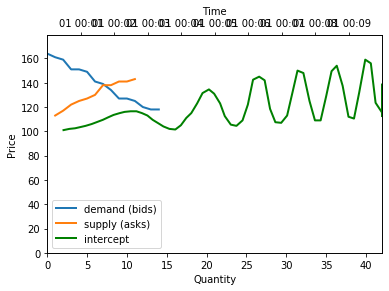

In [51]:
bids,asks,intersect=bid_ask_window(sess.sd,df,periods=30/sess.timer.step,step=10)
fig,h=demand_curve_intersect(bids,asks,intersect,df,path='basic_animation.mp4',window='30s')
h

We can also use the replay vars to plot how the best bid ask evolved and where transactions were relative to the supply demand curve.

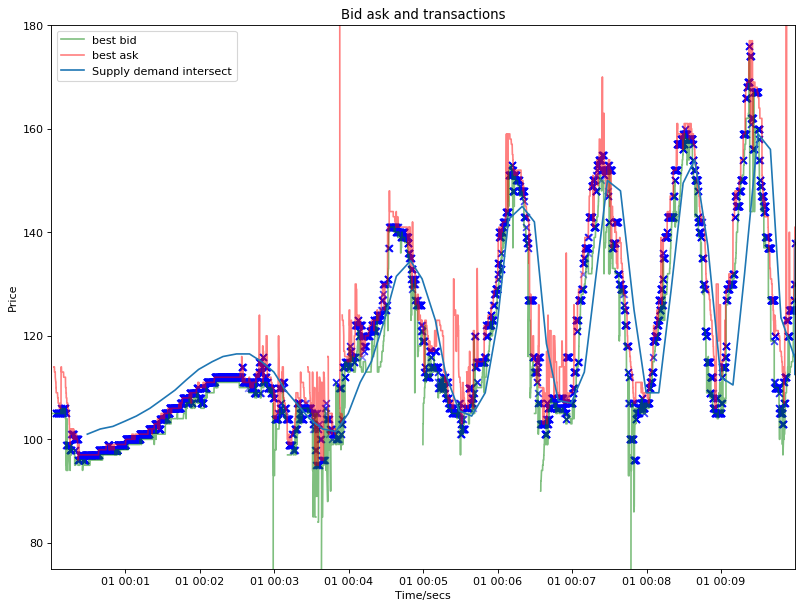

In [52]:
best_bid,best_ask,last_trans=sess.best_last(sess)
bid_ask_last_plot(best_bid,best_ask,last_trans,intersect)

We can also see how long a trade takes to be completed, measured from the time that a trader receives the instruction

In [53]:
order_list['waiting_time']=order_list.completion_time-order_list.index.values

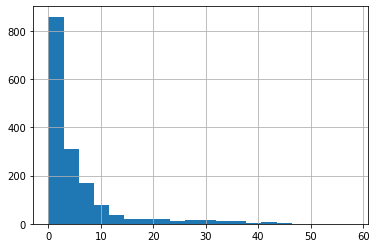

In [54]:
order_list['waiting_time'].astype('timedelta64[s]').hist(bins=20)